In [1]:
#import the libraries
import math
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#MACRO DEF

STOCK = 'MSFT'
EPOCHS = 50
model_path = 'machine learning model/'+STOCK+'_model.pkl'
START_DATE = '2012-01-01'
END_DATE = '2022-02-24'
PREDICT_DATE = '2022-02-24'
ERR_EPOCHS = 120

In [3]:
#get the stock data
df = web.DataReader(STOCK, data_source='yahoo' , start=START_DATE , end=END_DATE)

#show the data
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,26.959999,26.389999,26.549999,26.770000,64731500.0,21.623131
2012-01-04,27.469999,26.780001,26.820000,27.400000,80516100.0,22.132013
2012-01-05,27.730000,27.290001,27.379999,27.680000,56081400.0,22.358173
2012-01-06,28.190001,27.530001,27.530001,28.110001,99455500.0,22.705502
2012-01-09,28.100000,27.719999,28.049999,27.740000,59706800.0,22.406637
...,...,...,...,...,...,...
2022-02-17,296.799988,290.000000,296.359985,290.730011,32461600.0,290.730011
2022-02-18,293.859985,286.309998,293.049988,287.929993,34264000.0,287.929993
2022-02-22,291.540009,284.500000,285.000000,287.720001,41736100.0,287.720001


In [4]:
#get the number of rows and column in the data set
df.shape

(2554, 6)

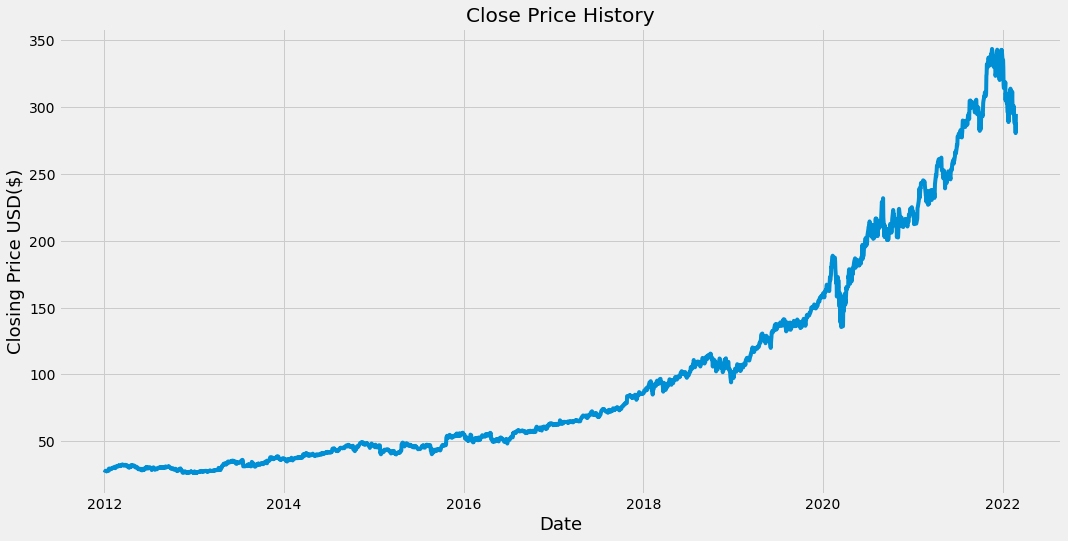

In [5]:
#Visualing the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price USD($)', fontsize=18)
plt.show()

In [6]:
#Create a new data
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

2044

In [7]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00126286],
       [0.00325187],
       [0.00413588],
       ...,
       [0.82512475],
       [0.80160384],
       [0.84681445]])

In [8]:
#creating the training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len,:]
#split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.00126286, 0.00325187, 0.00413588, 0.00549346, 0.00432531,
       0.00464103, 0.00426217, 0.00514617, 0.00593547, 0.00596704,
       0.00587232, 0.00552504, 0.01054492, 0.01060807, 0.00937677,
       0.01007135, 0.00988192, 0.00902948, 0.01022921, 0.00997664,
       0.01111321, 0.01130265, 0.01221822, 0.01209194, 0.01256551,
       0.01354423, 0.01389152, 0.01303908, 0.01329166, 0.01224979,
       0.01161836, 0.01553325, 0.01540696, 0.01600682, 0.0154701 ,
       0.01578582, 0.0161331 , 0.01572267, 0.0173644 , 0.01695397,
       0.01869041, 0.01802741, 0.01714339, 0.01638568, 0.01726968,
       0.0178064 , 0.01774326, 0.01790112, 0.01989012, 0.02020585,
       0.02045841, 0.01966912, 0.01840626, 0.01774326, 0.01749068,
       0.01777483, 0.0178064 , 0.01963756, 0.01941656, 0.01837469])]
[0.018153685590104426]

[array([0.00126286, 0.00325187, 0.00413588, 0.00549346, 0.00432531,
       0.00464103, 0.00426217, 0.00514617, 0.00593547, 0.00596704,
       0.00587232, 0.00552504, 0.0

In [9]:
#Convert the X_train and Y_train to numpy arrays
x_train , y_train = np.array(x_train), np.array(y_train)

In [10]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1984, 60, 1)

In [11]:
#Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape =(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
#compile the Model
model.compile(optimizer='adam', loss='mean_squared_error')


In [13]:
#train the model
model.fit(x_train, y_train, batch_size=32, epochs=EPOCHS)

Epoch 1/50
62/62 [==============================] - 5s 32ms/step - loss: 0.0023
Epoch 2/50
62/62 [==============================] - 2s 36ms/step - loss: 3.9822e-05
Epoch 3/50
62/62 [==============================] - 4s 62ms/step - loss: 3.9009e-05
Epoch 4/50
62/62 [==============================] - 4s 62ms/step - loss: 3.7707e-05
Epoch 5/50
62/62 [==============================] - 4s 63ms/step - loss: 4.2435e-05
Epoch 6/50
62/62 [==============================] - 2s 35ms/step - loss: 3.8475e-05
Epoch 7/50
62/62 [==============================] - 2s 30ms/step - loss: 3.9679e-05
Epoch 8/50
62/62 [==============================] - 2s 30ms/step - loss: 4.0010e-05
Epoch 9/50
62/62 [==============================] - 2s 32ms/step - loss: 4.0213e-05
Epoch 10/50
62/62 [==============================] - 4s 62ms/step - loss: 4.0135e-05
Epoch 11/50
62/62 [==============================] - 4s 62ms/step - loss: 4.1885e-05
Epoch 12/50
62/62 [==============================] - 4s 63ms/step - loss: 3.79

In [14]:
#create the testing data set
#create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#create the data sets x_test adn y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
    
    


In [15]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [16]:
#resahpe the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [17]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [18]:
#get the root mean squared error (RMSE)
rmse =  np.sqrt(np.mean(predictions - y_test)**2)


rmse

0.9400206921147365

C:\Users\Abhishek Rao\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


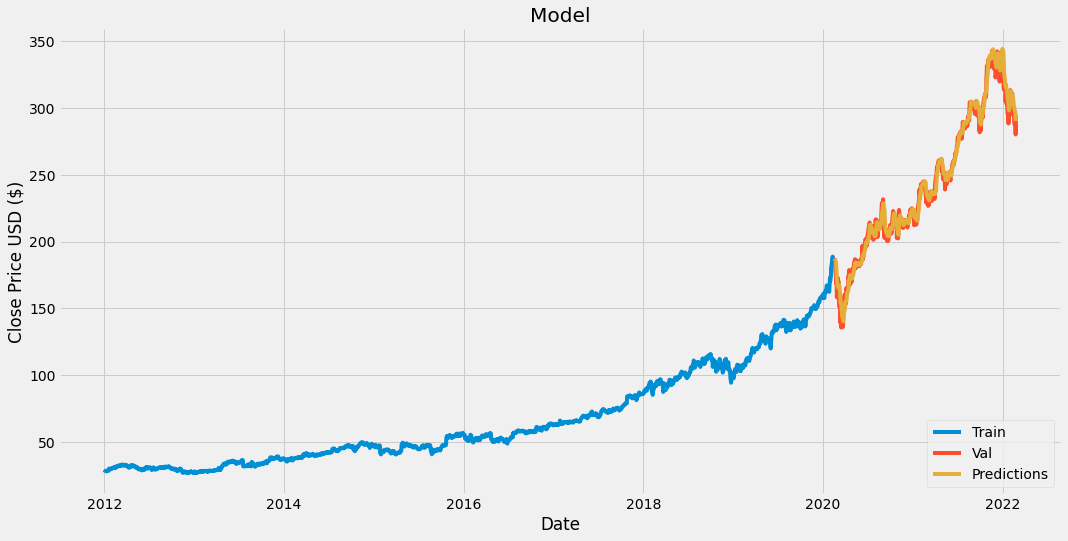

In [19]:
#plot the date
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [20]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-02-19,187.279999,185.328384
2020-02-20,184.419998,185.866577
2020-02-21,178.589996,185.696671
2020-02-24,170.889999,184.015533
2020-02-25,168.070007,180.440613
...,...,...
2022-02-17,290.730011,301.472504
2022-02-18,287.929993,299.377899
2022-02-22,287.720001,296.500244


In [21]:
#get the Quote
stock_quote = web.DataReader(STOCK, data_source = 'yahoo', start=START_DATE, end=END_DATE)
#create new data frame
new_df = stock_quote.filter(['Close'])
#get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create the empty list
x_test = []
#append the past 60 days
x_test.append(last_60_days_scaled)
#convert the x_test data set to a numpy array
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
#get the predicted scaled price
pred_price = model.predict(x_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[290.8072]]


In [22]:
apple_quote2 = web.DataReader(STOCK, data_source = 'yahoo', start=PREDICT_DATE, end=PREDICT_DATE)
print(apple_quote2['Close'])

Date
2022-02-23    160.070007
2022-02-24    162.740005
Name: Close, dtype: float64


In [23]:
import joblib

joblib.dump(model,model_path)
    


INFO:tensorflow:Assets written to: ram://b80a7e66-e226-43f8-a272-e14d56691fb3/assets


INFO:tensorflow:Assets written to: ram://b80a7e66-e226-43f8-a272-e14d56691fb3/assets


['machine learning model/MSFT_model.pkl']